# Imports

In [1]:
### library/modules = toolbox

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

## dictionary needed if using 'csv'
flowers = {0: 'setosa',
           1: 'versicolor',
           2: 'virginica'}

### from csv
#data = pd.read_csv('./data/iris.csv')
#data['species'] = data['species'].map(flowers)


### from seaborn, included dataset
data = sns.load_dataset('iris')


In [3]:
display(data.head(3))
display(data.tail(4))


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# EDA

## 1. Format-analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> sepal_length (=distance) : float64 & is a continuous numerical   statistical variable  
> sepal_width  (=distance) : float64 & is a continuous numerical   statistical variable  
> petal_length (=distance) : float64 & is a continuous numerical   statistical variable  
> petal_width  (=distance) : float64 & is a continuous numerical  statistical variable  
> species      : object -> is a nominal categorical statistical variable  


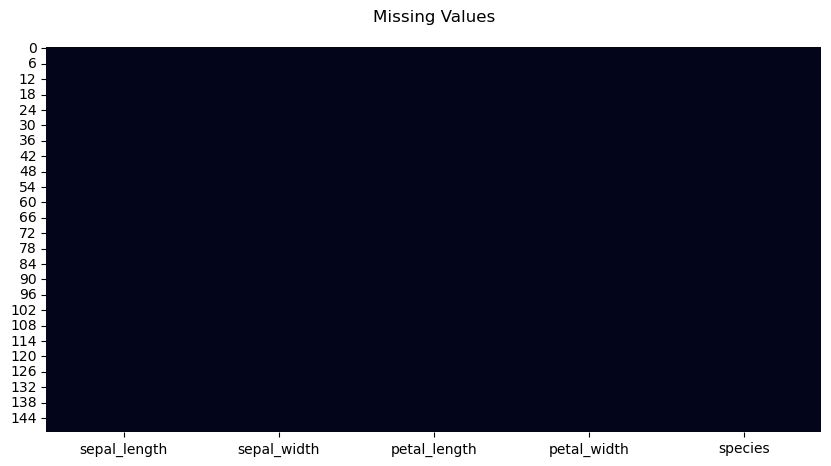

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
plt.figure(figsize=(10, 5))

plt.title('Missing Values\n')

sns.heatmap(data.isnull(), cbar=False)
plt.show()

data.isnull().sum()

## 2. Univariate content-analysis
### 2.a. Target analysis


In [6]:
### referencing for systematic use of this template
target = 'species'


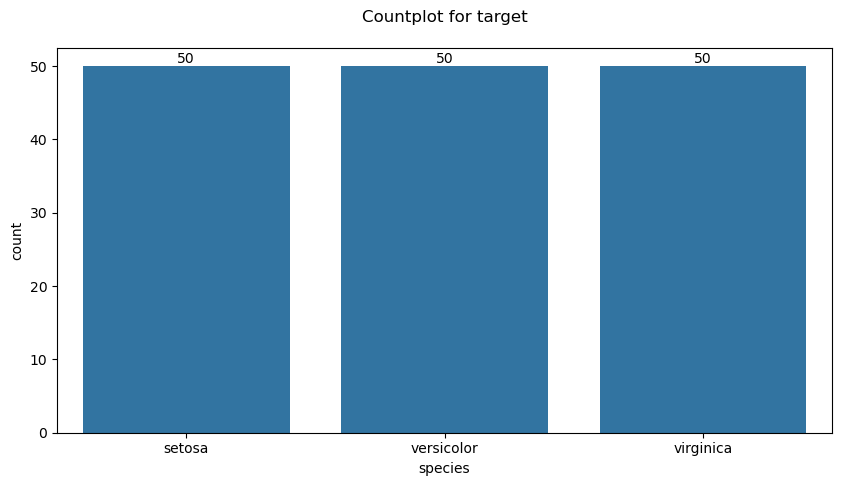

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [7]:
### recommendations:
### if the column is a categorical variable: -> barplot for visualisation
### if the column is a numerical variable: -> histogram for visualisation


plt.figure(figsize=(10, 5))
plt.title('Countplot for target\n')

ax = sns.countplot(data=data, x=target) # countplot = barplot + count

### show the data-labels for each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()



### show same info but in a table/list/series
print(data[target].value_counts())


In [8]:
### elementary statistics

data[[target]].describe()

,species
count,150
unique,3
top,setosa
freq,50


In [9]:
### here only to illustrate the possibility,
### real appropriate (see below) 

### if target/feature is an ordinal categorical (except (*))
### translate the values into an order via , for example, a dictionary 

dict_species = {'setosa':0,'virginica':1,'versicolor':2} 

# alternative: Ordinal Encoder de sklearn
data_ord = data.copy()
data_ord[target] = data_ord[target].map(dict_species) 

### procedure needed for machine-learning (see later)
### for correlation (pearson) not recommended (distance between values of ordinal categorical not defined)

data_ord.head(3)


# (*) except : cardinality/nubmer of unique in columns too high (>10) 
# (depending on hardware)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [10]:
# if nominal : add columns (except (*))
if False:
    data['is_setosa'] = data['species'] == 'setosa'
    data['is_virginica'] = data['species'] == 'virginica'
    data['is_versicolor'] = data['species'] == 'versicolor'


# (*) except : cardinality/nubmer of unique in columns too high (>10) 
# (depending on hardware)



### nunique>10: 

- as ordinal: impose an order (= arbitrary)
- keep top 10 (frequency) values, else 'other' category 

In [11]:
### if target is a nominal categorical 
### => decomposing target/feature into 3 columns for analysis is a good idea, but keep original format too


# (*) except : cardinality/nubmer of unique in columns too high (>10) 
# (depending on hardware)


temp = pd.get_dummies(data[target], prefix='is')
# alternative: OneHot Encoder in sklearn

target_lst = temp.columns.to_list()

data_nom = (data.copy()).drop(columns=[target])

data_nom = pd.concat([data_nom,temp],axis=1)

data_nom.head(3)

,sepal_length,sepal_width,petal_length,petal_width,is_setosa,is_versicolor,is_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False


In [12]:
temp

,is_setosa,is_versicolor,is_virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [13]:
data_nom[target_lst].head()

,is_setosa,is_versicolor,is_virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [14]:
### more statistics available with data_nom (or data_ord)
data_nom[target_lst].describe()

,is_setosa,is_versicolor,is_virginica
count,150,150,150
unique,2,2,2
top,False,False,False
freq,100,100,100


### 2.b. Features analysis: setup

In [15]:
feat_cols = data.columns.to_list()
feat_cols.remove(target)

In [16]:
feat_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

> sepal_length : float64 -> is a continuous numerical   statistical variable  
> sepal_width  : float64 -> is a continuous numerical   statistical variable  
> petal_length : float64 -> is a continuous numerical   statistical variable  
> petal_width  : float64 -> is a continuous numerical   statistical variable  

In [17]:

### VERY CRITICAL input from user !!!

### segregation of features into relevant groups of statistical variables

### ordinal_categorical
ord_cols = [] # empty for iris-dataset 

### nominal_categorical
nom_cols = [] # empty for iris-dataset 

### all_categorical together
cat_cols = ord_cols + nom_cols 

### all numerical = all_features - all_categorical
num_cols = feat_cols.copy() 
for col in cat_cols:
    num_cols.remove(col)


### 2.c. Categorical features

In [18]:
cat_cols

[]

In [19]:
# nothing to do here with iris-dataset

### 2.d. Numerical features

In [20]:
num_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

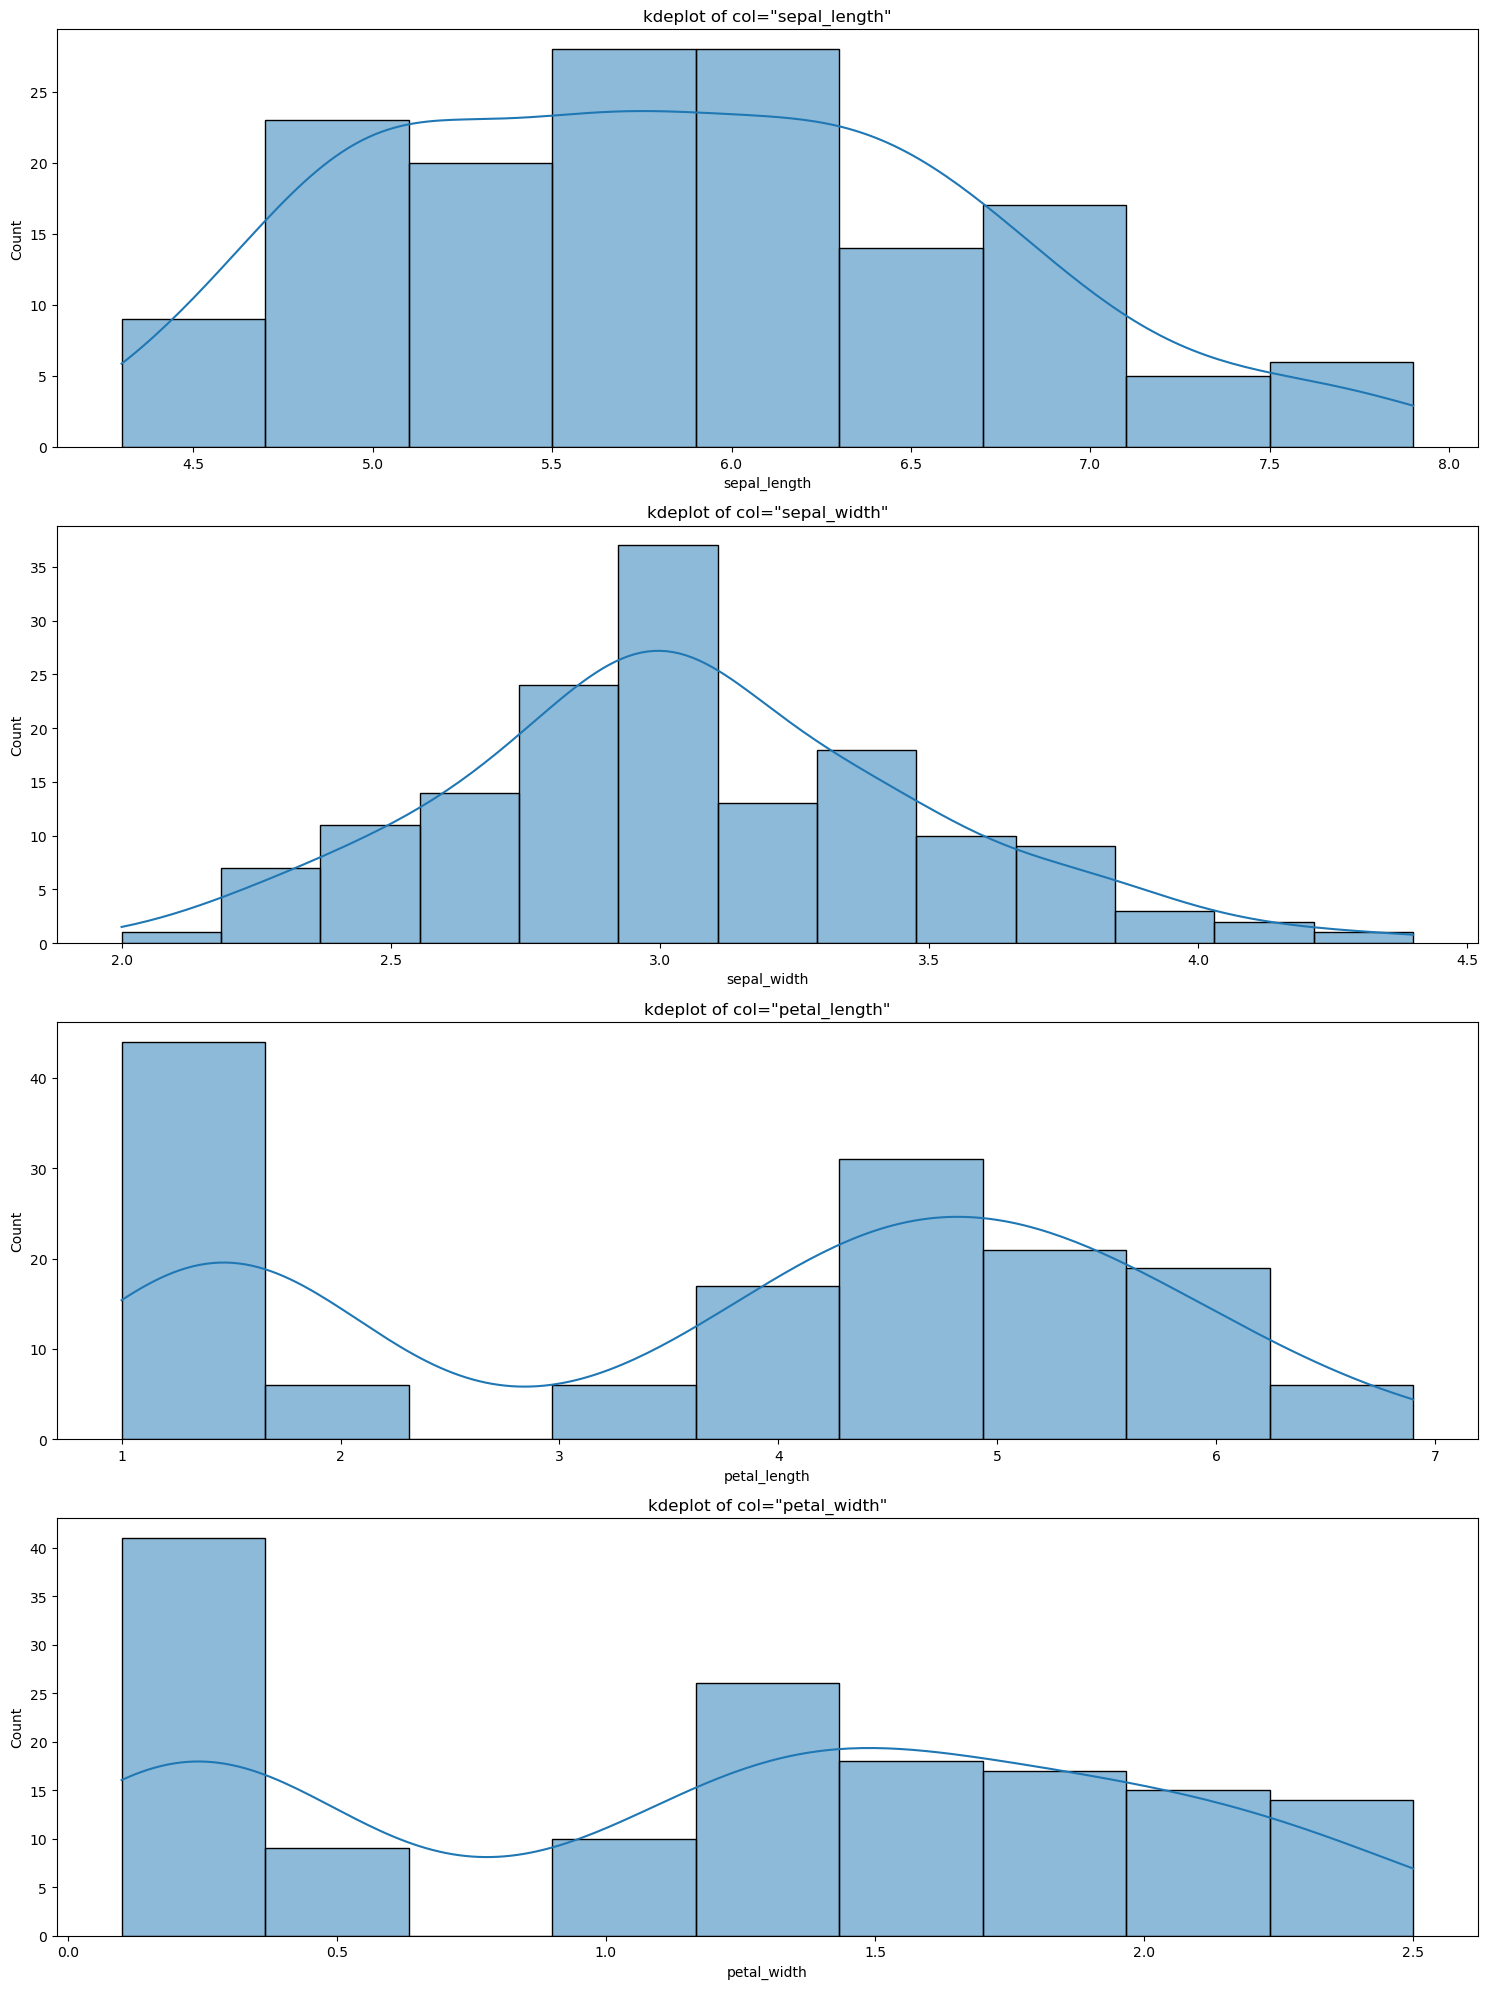

In [21]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram
    sns.histplot(data=data, x=col
                      , fill=True
                      #, element="step" #
                      , stat = 'count' # 'count','density','percent', ...
                      , discrete=False
                      , kde=True
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [22]:
display(data[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## 3. Bivariate content analysis: features vs target




## 3.a.  Categorical vs target


recommendations:  
__feature vs target:__
- _categorical vs categorical:_  
        barplot/countplot/pie-chart of feature,  
        color/hue based on target values  
        
        groupby(target)

- _categorical vs numerical:_  
        histogram of target,  
        color/hue based on feature   
        
        groupby(feature)

In [23]:
# nothing to do here with iris-dataset

## 3.b. Numerical vs target


recommendations:  
__feature vs target:__
- _numerical vs categorical:_  
        histogram of feature,  
        color/hue based on target 
        
        groupby(target)
    

- _numerical vs numerical:_  
        scatter/pair plot with 
        feature on x-axis, target on y-axis
        
        no groupby

In [24]:
num_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

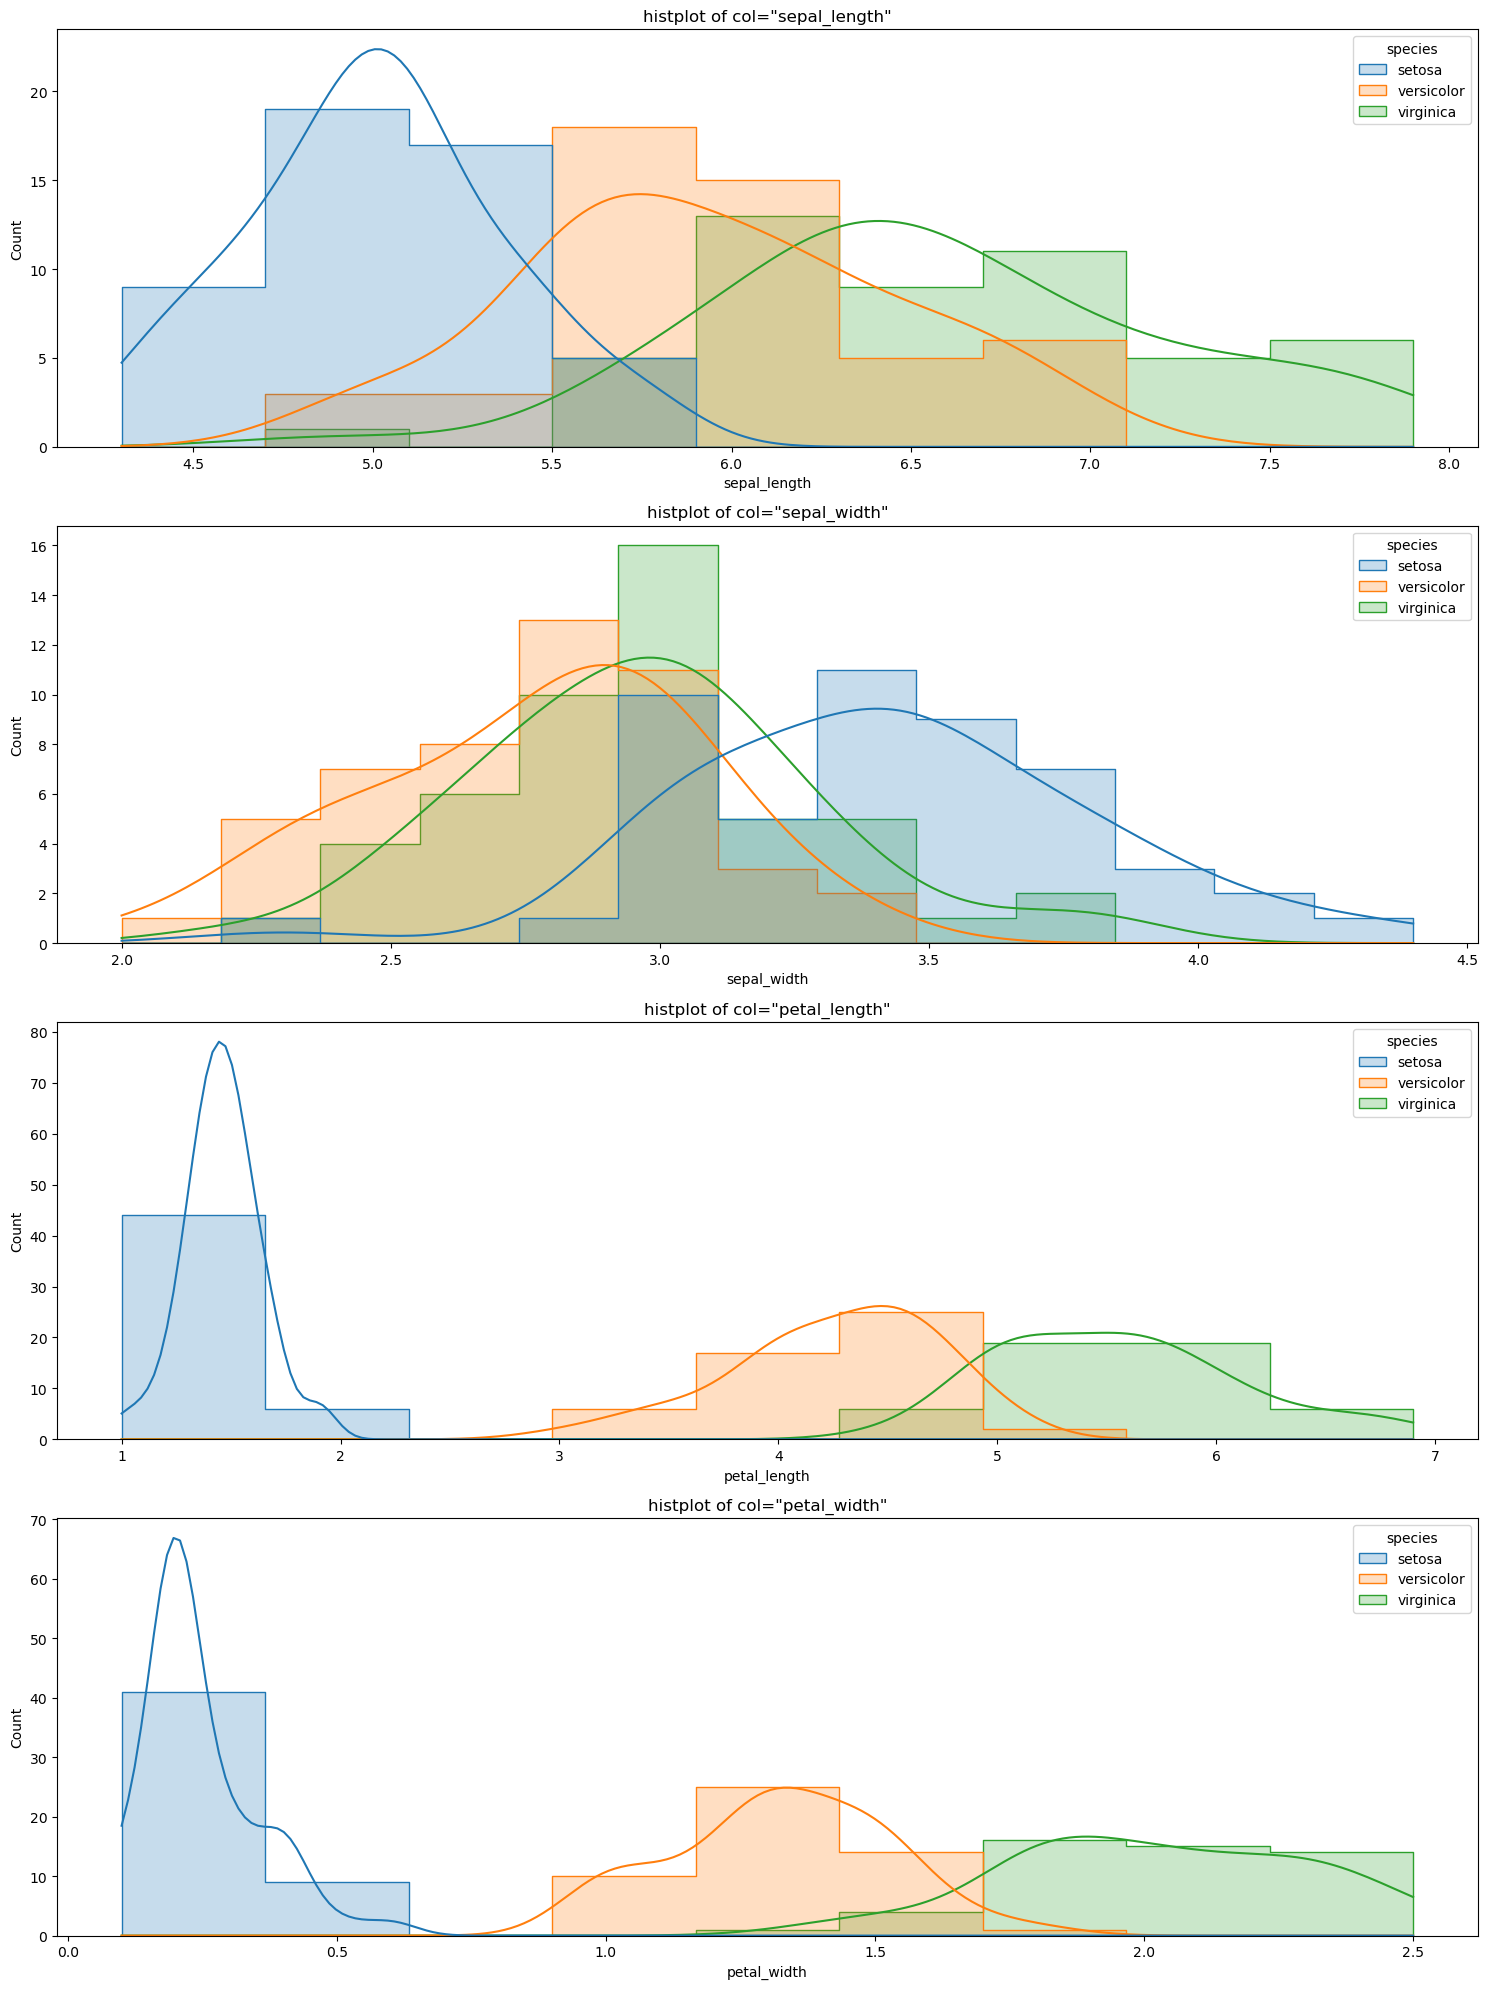

In [25]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'histplot of col="{col}"')
    
    ### simple histogram, colored by target
    sns.histplot(data=data
                     , x=col
                     
                     , fill=True
                     , element="step"
                     
                     , stat = 'count' # 'count','density','percent', ...
                     
                     , discrete=False
                     , kde=True
                     
                 
                     , hue = target # give color based on values of categorical target  
                     #, multiple = 'stack'
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

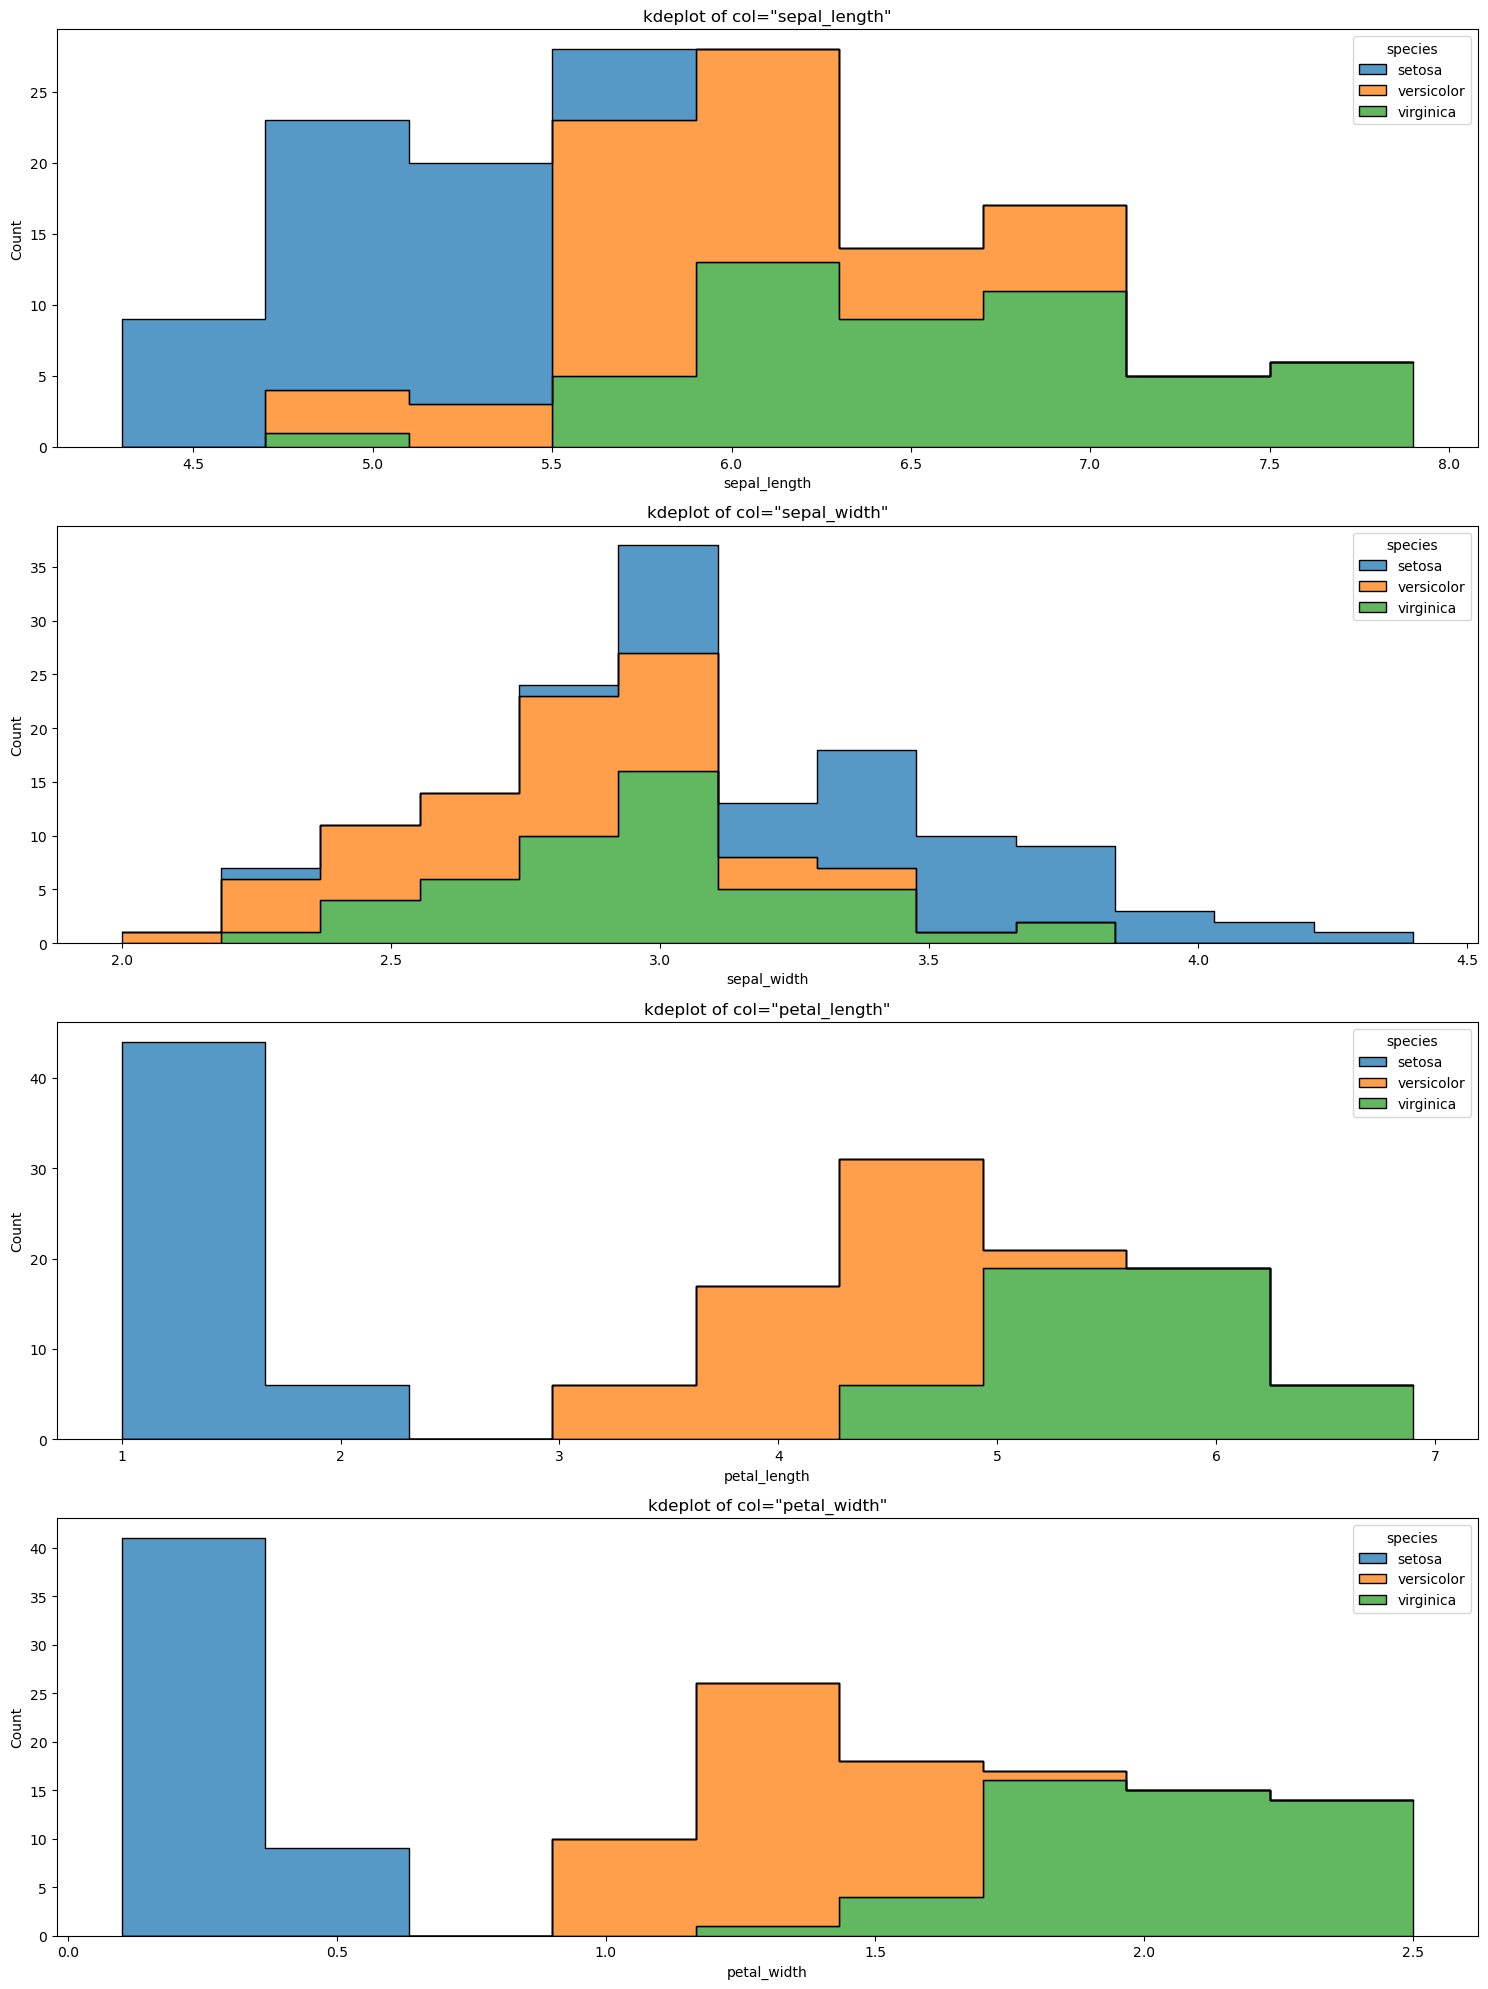

In [26]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram, colored by target
    sns.histplot(data=data, x=col
                     , fill=True
                     , element="step"
                     , stat = 'count' # 'count','density','percent', ...
                     , discrete=False
                     #, kde=True
                     
                 
                     , hue = target # give color based on values of categorical target  
                     , multiple = 'stack'
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

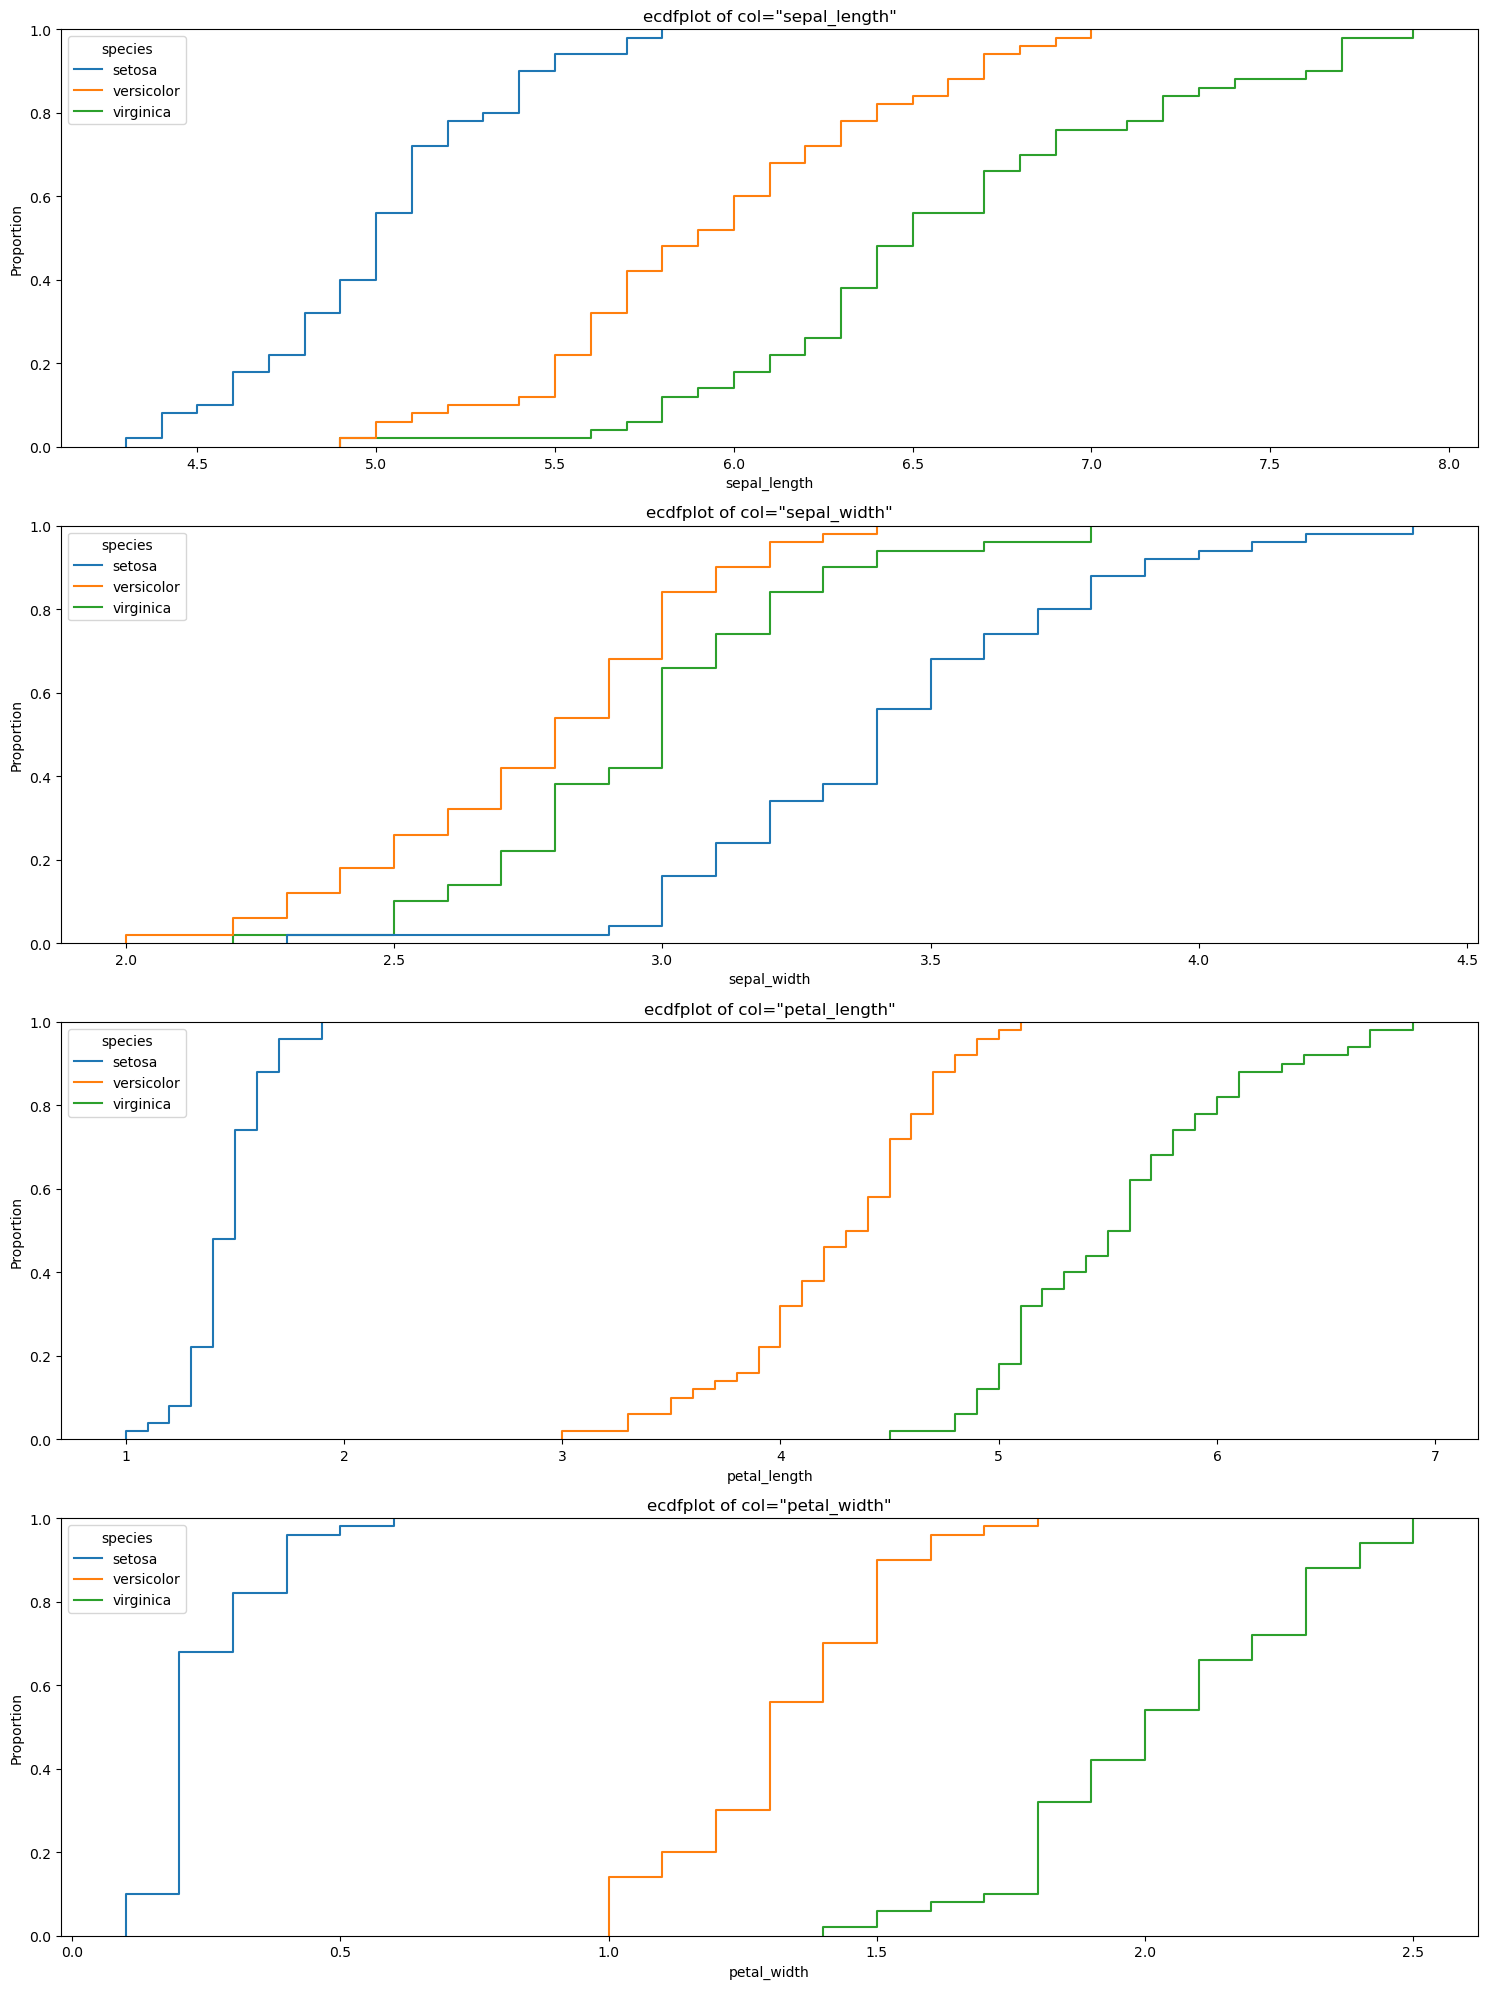

In [27]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'ecdfplot of col="{col}"')
    
    ### ecdf empirical cumulated density function, colored by target
    sns.ecdfplot(data=data, x=col
                     , hue = target # give color based on values of categorical target  
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [28]:
### groupby-statistics

for col in num_cols:
    display(data[[col,target]].groupby(target).describe())

sepal_length                                            
                  count   mean       std  min    25%  50%  75%  max
species                                                            
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

sepal_width                                              
                 count   mean       std  min    25%  50%    75%  max
species                                                             
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

petal_length                                             
                  count   mean       std  min  25%   50%    75%  max
species                                                             
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

petal_width                                          
                 count   mean       std  min  25%  50%  75%  max
species                                                         
setosa            50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6
versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

__alternative visualisations: boxplot__

IQR = Q3-Q1 # Inter-Quartile Range

outlier = IF abs(x-Q1/3) > IQR*1.5 (by convention)

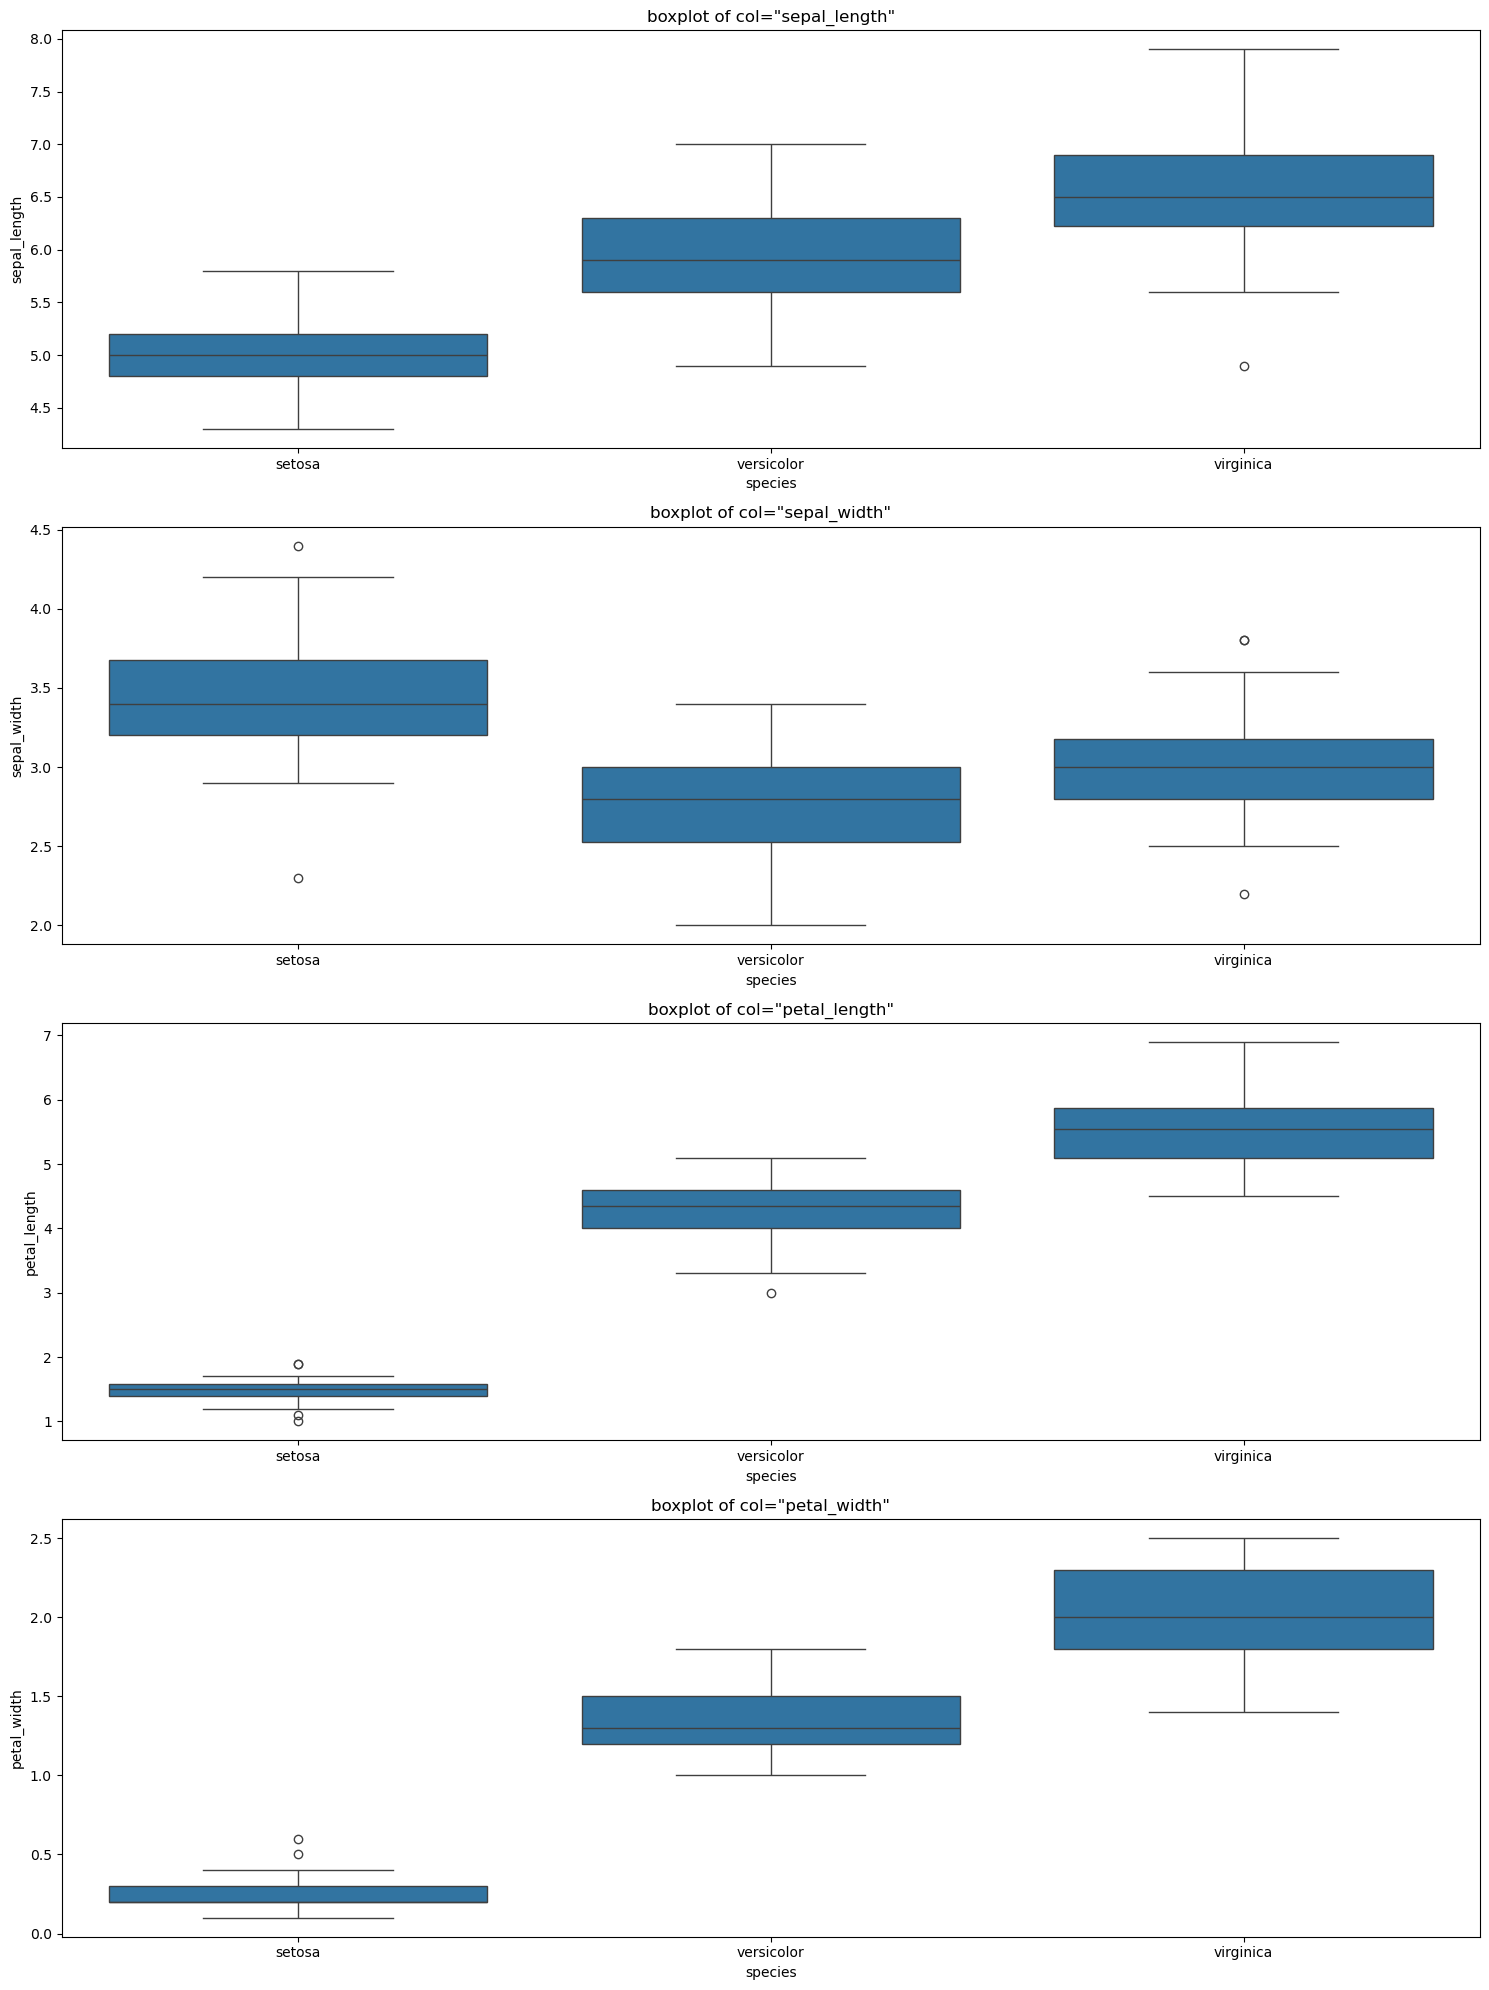

In [29]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a boxplot
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'boxplot of col="{col}"')
    
    ### boxplot uses Quartiles, median from data 
    sns.boxplot(data=data, x=target, y=col)
                    
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

__alternate visualisations: violin plot__

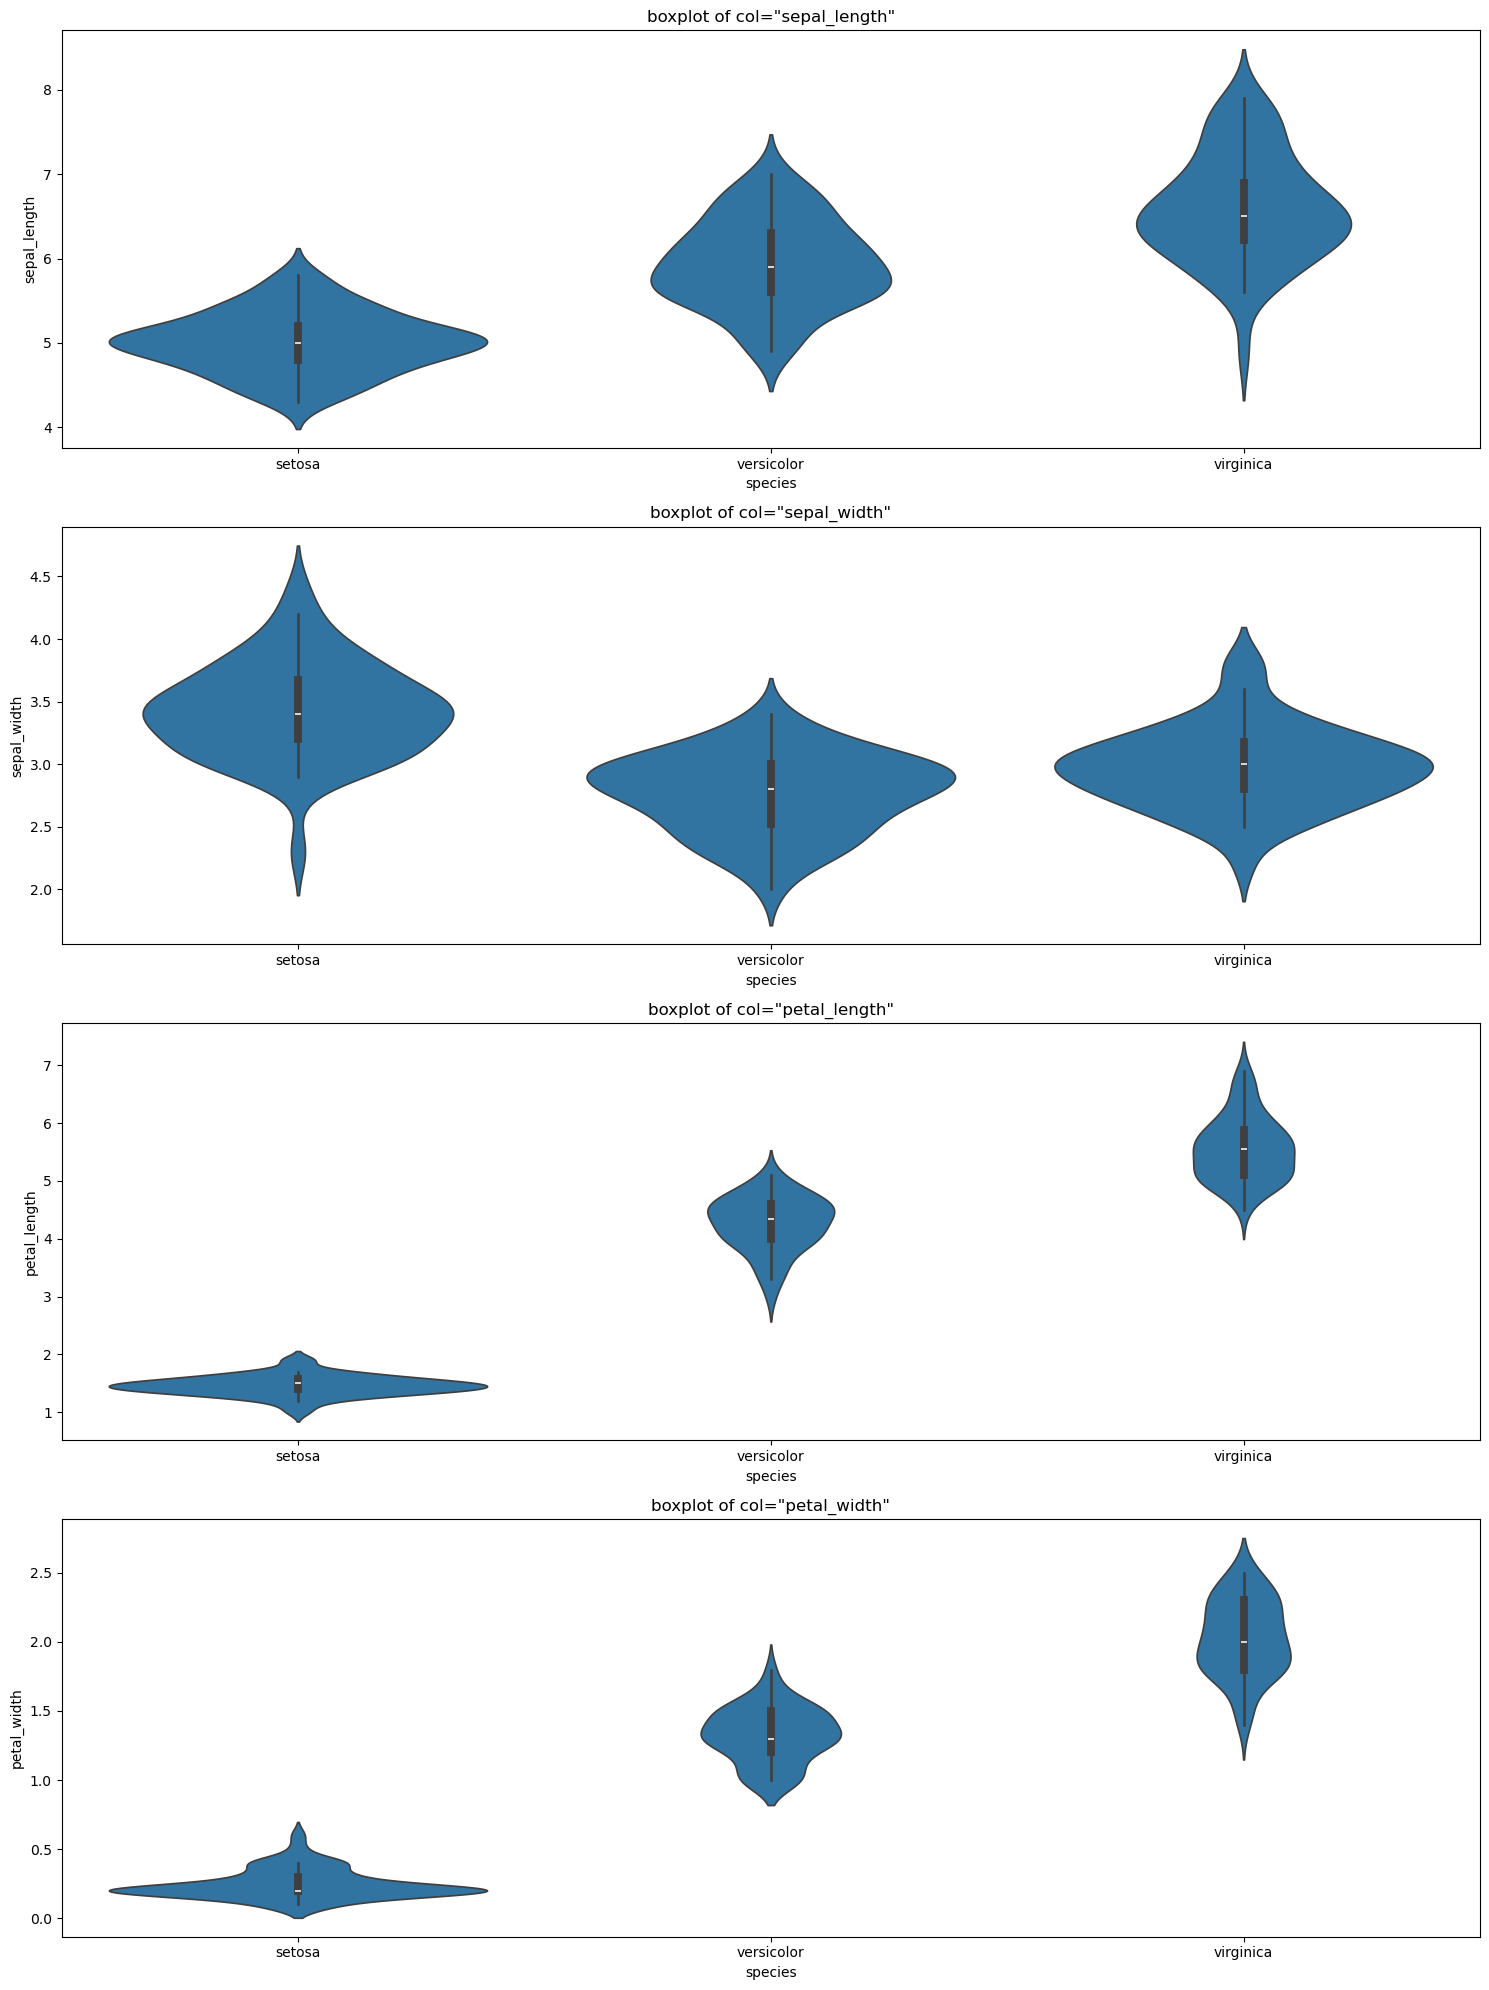

In [30]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a violinplot
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'boxplot of col="{col}"')
    
    ### violinplot 
    sns.violinplot(data = data , x=target, y=col )
                    
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

## 3.c. Correlations

works only on numbers, not text

In [31]:
### show only correlations between my numerical/numerized features

data[feat_cols].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [32]:
### with the data_ord it works, 
### however here target is not an ordinal so interpretation can be misleading 

data_ord[[target]+feat_cols].corr() # [target]+features : -> reorder columns

,species,sepal_length,sepal_width,petal_length,petal_width
species,1.000000,0.460039,-0.618372,0.649242,0.580377
sepal_length,0.460039,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.618372,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.649242,0.871754,-0.428440,1.000000,0.962865
petal_width,0.580377,0.817941,-0.366126,0.962865,1.000000


In [33]:
### with the data_nom it works, 
### here best result with current (target-)data

data_nom[target_lst+feat_cols].corr() # target_lst+features : -> reorder columns

,is_setosa,is_versicolor,is_virginica,sepal_length,sepal_width,petal_length,petal_width
is_setosa,1.000000,-0.500000,-0.500000,-0.717416,0.603348,-0.922765,-0.887344
is_versicolor,-0.500000,1.000000,-0.500000,0.079396,-0.467703,0.201754,0.117899
is_virginica,-0.500000,-0.500000,1.000000,0.638020,-0.135645,0.721011,0.769445
sepal_length,-0.717416,0.079396,0.638020,1.000000,-0.117570,0.871754,0.817941
sepal_width,0.603348,-0.467703,-0.135645,-0.117570,1.000000,-0.428440,-0.366126
petal_length,-0.922765,0.201754,0.721011,0.871754,-0.428440,1.000000,0.962865
petal_width,-0.887344,0.117899,0.769445,0.817941,-0.366126,0.962865,1.000000


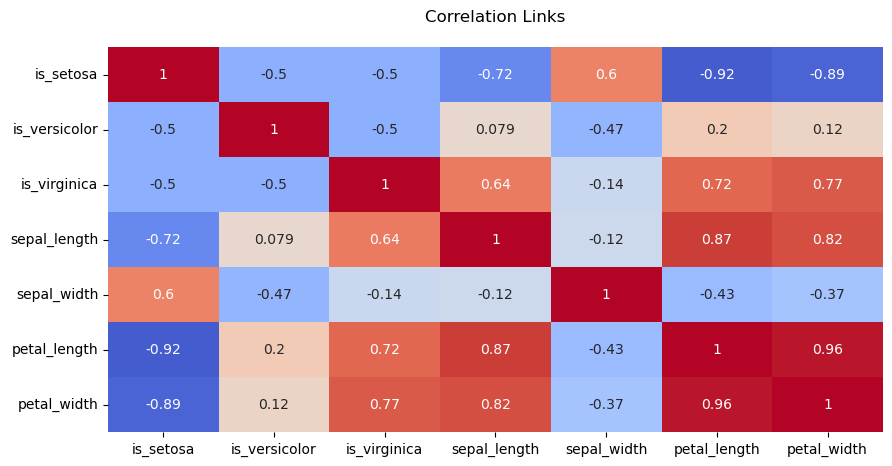

In [34]:

corr_init = data_nom[target_lst+feat_cols].corr()

### put the same info in a graph
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')


### heatmap with symetric table
sns.heatmap(data = corr_init,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True,
           )
plt.show()


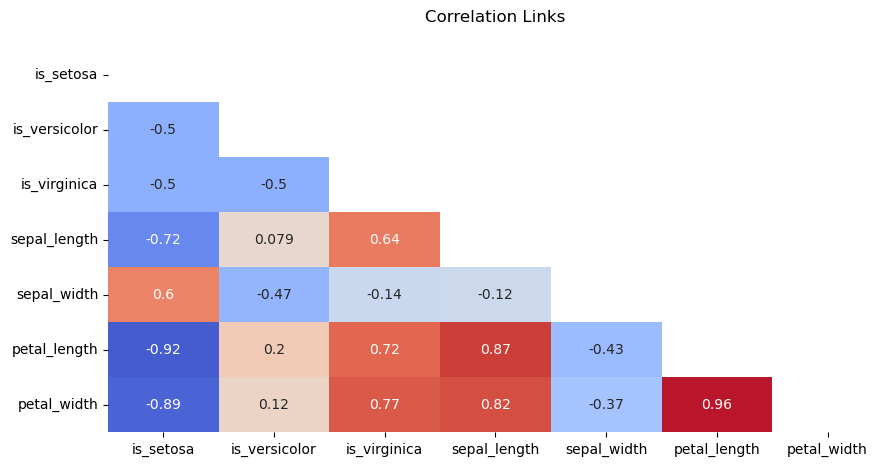

In [35]:

corr_init = data_nom[target_lst+feat_cols].corr()

mask = np.triu(np.ones_like(corr_init, dtype=bool))

### put the same info in a graph
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')


### heatmap with symetric table
sns.heatmap(data = corr_init,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True,
            mask=mask, #mask == hide values
           )
plt.show()


In [36]:
data_nom.head()

,sepal_length,sepal_width,petal_length,petal_width,is_setosa,is_versicolor,is_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


## 4. Multivariate content analysis
recommendations:

 - try pairplot where applicable
 - groupby where applicable

 - violinplot
>there are no additional general recommendations,
    it depends mostly on context/meaning of the columns

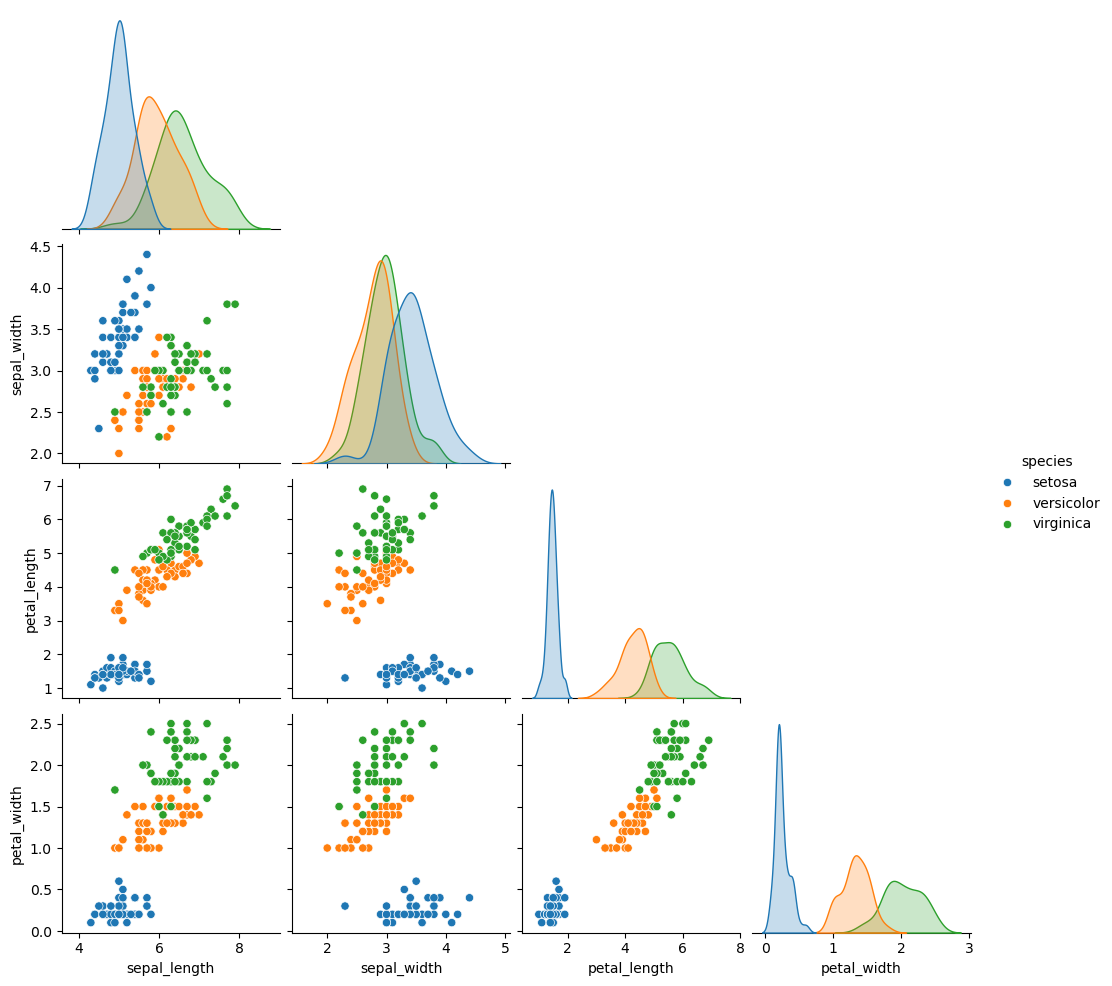

In [37]:
if True:
    ### the following pairplot provides a bunch of scatter plot between 
    ### all the combinations of2 numerical features,
    ### while the color depends on the target values

    #plt.figure(figsize=(30, 10))
    sns.pairplot(data=data, hue=target, corner =True) #target categorie => hue = target

    plt.savefig('pairplot_iris.pdf', dpi=300)
    plt.show()

# Few unkown data points:

In [38]:
# get mean, and std
means_data = data[feat_cols].mean().to_list()
stds_data = data[feat_cols].std().to_list()

n_new = 3

In [39]:
### generate new (here fake) data, based on statistical properties of original data

new_data_dict= {f:np.random.normal(means_data[i], 
                                   stds_data[i],
                                   n_new) for i,f in enumerate(feat_cols[:-1])} 

In [40]:
### petal_width will be calculated based on petal_length
new_data_dict

{'sepal_length': array([3.97126251, 6.13398805, 3.94372613]),
 'sepal_width': array([3.25604781, 3.09367882, 2.7366757 ]),
 'petal_length': array([ 2.70368389,  3.25679545, -0.31076405])}

In [41]:
### ration petal 'width'/'length'
petal_width_over_length_ratio = means_data[-1]/means_data[-2]

### make a dataframe
new_data =pd.DataFrame(new_data_dict)

### calc petal_width
new_data['petal_width'] = new_data['petal_length']*petal_width_over_length_ratio

### put fixed value 'unknown' for this new data into 'species'-column
new_data['species']=[f'unknown_{i}' for i in range(3)]

### give other kind of index
new_data.index = list('abcdefghijklmnopqrstuvwxyz')[:n_new]
new_data

,sepal_length,sepal_width,petal_length,petal_width,species
a,3.971263,3.256048,2.703684,0.862857,unknown_0
b,6.133988,3.093679,3.256795,1.039378,unknown_1
c,3.943726,2.736676,-0.310764,-0.099178,unknown_2


In [42]:
### combine to plot nicely together
comb_data = pd.concat([data,new_data],axis=0)
comb_data.tail(7)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.300000,2.500000,5.000000,1.900000,virginica
147,6.500000,3.000000,5.200000,2.000000,virginica
148,6.200000,3.400000,5.400000,2.300000,virginica
149,5.900000,3.000000,5.100000,1.800000,virginica
a,3.971263,3.256048,2.703684,0.862857,unknown_0
b,6.133988,3.093679,3.256795,1.039378,unknown_1
c,3.943726,2.736676,-0.310764,-0.099178,unknown_2


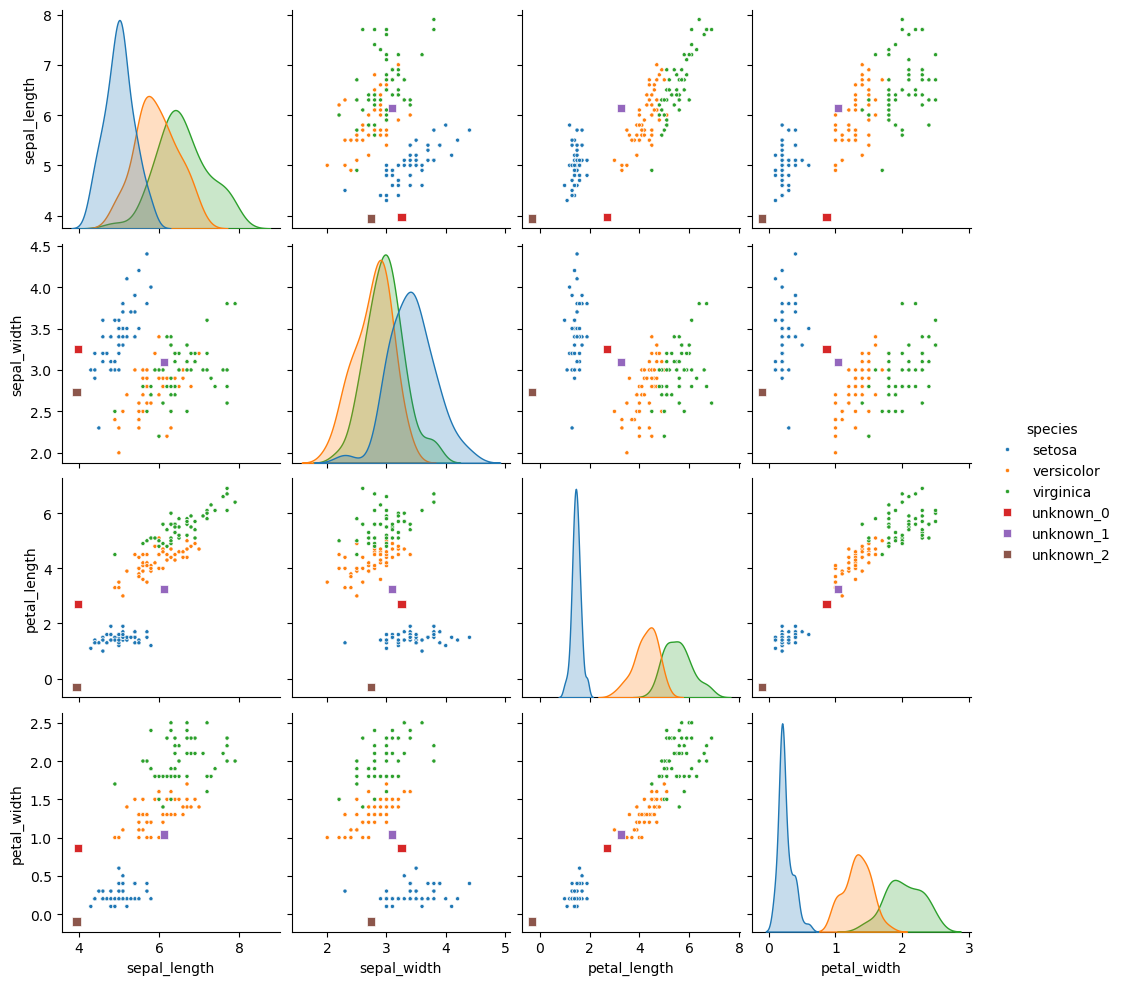

In [43]:

sns.pairplot(data=comb_data, 
             hue = 'species', 
             markers={'unknown_0':'s','unknown_1':'s','unknown_2':'s',  'setosa':'.','virginica':'.','versicolor':'.'}
            )

plt.savefig('fake_pairplot.pdf')
plt.show()